<a href="https://colab.research.google.com/github/DButmeh/Adult-income-dataset/blob/main/Adult%20Income%20Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adult income dataset

##Dina Al Botmeh
---------------------------------------------------------------------------------

#The task is to build a model that helps in predicting income level based on the individual’s personal information.

------------------------------------------

# ⭐️ **Project 4 - Part 3(Core)**
>[Click here](#new20) to jump to assignment's solution.
- ​Build a small neural network (with only 1 hidden layer)
>[Click here](#new20a)
- Save the history and visualize it.
>[Click here](#new20b)
- Evaluate the model using sklearn evaluation metrics.
>[Click here](#new20c)


# ⭐️ **Tune at least 3 parameters with the Keras tuner**
>[Click here](#new21) to jump to assignment's solution.

# ⭐️ **About Dataset:**
>[Click here](#new9) to jump to assignment's solution.

<a name='new0'></a>
# ⭐️ **Prepare/clean the data:**
>[Click here](#new1) to jump to assignment's solution.


# ⭐️ **Preprocess data**
>[Click here](#new3) to jump to assignment's solution.



# ⭐️**Fit and evaluate a default random forest model**
>[Click here](#new7) to jump to assignment's solution.


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

####  **Functions for EDA** Functions for EDA inspection REG & CLASS target
>[Click here](#newc) to jump to EDA .

 ####  **Functions for EDA**: Evaluation Classification
>[Click here](#newf) to jump to EDA .

 #### **Functions for EDA** Feature Importances
>[Click here](#newB) to jump to EDA .

 ####  **Functions for** function for plotting each metric
>[Click here](#newA) to jump to EDA .

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

<a name='newc'></a>
## ⭐️**Functions for EDA** inspection REG & CLASS target
>[Click here](#new0) to jump to up .

<a name='newf'></a>
# ⭐️**Functions for EDA** Evaluation Classification
>[Click here](#new0) to jump to up .

<a name='newB'></a>
###⭐️**Functions for classification_metrics**
>[Click here](#new0) to jump up.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

<a name='newA'></a>
###⭐️**Functions for**  function for plotting each metric
>[Click here](#new0) to jump up.

In [ ]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes



#load data

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns',100)


import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style="ticks", color_codes=True)
from types import FrameType
from pickle import FRAME
from typing import Pattern

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix
import xgboost as xgb

# Deep learning tols

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
from sklearn import set_config

# import metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay,
                             classification_report )
# setting random state for reproducibility
SEED = 321
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

<a name='new9'></a>
## ⭐️**About Dataset**
>[Click here](#new0) to jump to up .

Attribute Information
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,  State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K

In [ ]:
# Load data from folder structure
fpath =("/content/drive/MyDrive/week 9study/adult.csv")
# Read in the data
df =pd.read_csv(fpath)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<a name='new1'></a>
# ⭐️**Prepare/clean the data:**
>[Click here](#new0) to jump to up .

In [ ]:
# Check for duplicates
df.duplicated().sum()

52

In [ ]:
# Remove duplicates rows based on all columns and reset the index
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48790 entries, 0 to 48789
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## **Check for missing values**

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


#Check for and address any inconsistent values in categorical columns.

In [ ]:
# Remake the list of string columns
string_cols = df.select_dtypes('object').columns

# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(df[col].value_counts(dropna = False))
  # Print an empty line for readability
  print()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial   

#There is lot off missing data filled with ?
- replace it direct to missing

In [ ]:
df.replace(' ?', "Missing", inplace=True)

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# There is no  impossible values

 <a name='new3'></a>
# ⭐️**Preprocess data**
>[Click here](#new0) to jump to up .

In [ ]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['income'].value_counts(normalize = True)

,proportion
income,
<=50K,0.760586
>50K,0.239414


###The data set is  imbalanced <=50K=76% while>50K =0.24%.
-  so we will aim to achieve the best results for each in terms of recall

##Separate the data.

In [ ]:
# Create features matrix and target vector
X = df.drop(columns = ['income'])
y = df['income']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,stratify=y)

In [ ]:
# Convert target to numbers
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train

array([0, 0, 0, ..., 0, 0, 0])

#Categorical Preprocessing Pipeline

In [ ]:
# Create the preprocessing pipeline for categorical data
# (New) Select columns wiht make_column)selector
cat_selector=make_column_selector(dtype_include="object")
# Insantiate transfomers
ohe=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
# Insantiate transfomers
cat_pipe=make_pipeline(ohe)
# Make a tuple for column transformer
cat_tuple=("categorical",cat_pipe,cat_selector)
cat_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a10f0323e80>)

# Numeric reprocessing Pipeline

In [ ]:
# (New) Select columns wiht make_column)selector
num_selector=make_column_selector(dtype_include="number")
#Instantiate the transformers
scaler = StandardScaler()
# Make the tuple for ColumnTransformer
num_tuple=('numeric',scaler,num_selector)
num_tuple

('numeric',
 StandardScaler(),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a10f0320550>)

#Create Preprocessor


In [ ]:
preprocessor = ColumnTransformer([num_tuple,cat_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a10f0320550>),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a10f0323e80>)],
                  verbose_feature_names_out=False)

 <a name='new7'></a>
# ⭐️**Fit and evaluate a default random forest model**
>[Click here](#new0) to jump to up

In [ ]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                          columns = feature_names, index = X_train.index)

X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                          columns = feature_names, index = X_test.index)
X_test_tf.head(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
29767,0.609788,0.412138,1.528774,3.514834,-0.218614,1.580718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9530,1.048148,0.235944,0.359816,-0.144405,4.720224,-0.032712,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44600,0.609788,2.183957,1.139121,-0.144405,-0.218614,-0.032712,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#a)default RandomForestClassifier model

In [ ]:
plt.style.use("default")

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27831
           1       1.00      1.00      1.00      8761

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



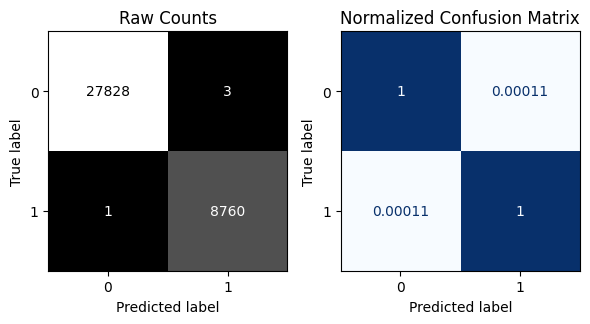


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9278
           1       0.73      0.62      0.67      2920

    accuracy                           0.85     12198
   macro avg       0.81      0.77      0.79     12198
weighted avg       0.85      0.85      0.85     12198



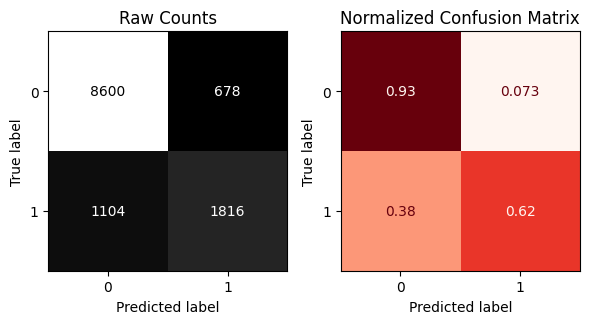

In [ ]:
# Make an instance of the model with default parameters
rf= RandomForestClassifier(random_state = 42)
# Fit the model  on the X_train_tf .and y train
rf.fit(X_train_tf, y_train)
# Use custom function to evaluate default model
evaluate_classification(rf, X_train_tf, y_train, X_test_tf, y_test)

---------------------------------------------------------
<a name='new20'></a>
#⭐️ **Project 4 - Part 3 (Core)**
>[Click here](#new0) to jump to up .

In [ ]:
#scale X_train to scale Categorical
scaler = StandardScaler()
X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

<a name='new20a'></a>
#​Build a small neural network (with only 1 hidden layer)

In [ ]:
# define input shape
input_shape = X_train_tf.shape[1]
input_shape


108

In [ ]:
# Build binary classification model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(15, # with only 1 hidden layer
                input_dim =input_shape,
                activation = 'relu'))
    #output Layer
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model



In [ ]:
# Call our build function to build model
model = build_model()

# Get model summary
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 15)                  │           1,635 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,651 (6.45 KB)

 Trainable params: 1,651 (6.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Instantiate EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)#Start with patience =5 monitoring val_accuracy

In [ ]:
# Fit the model
history = model.fit(X_train_tf, y_train,
                    validation_split=0.2,# a validation_split of .2
                    epochs=50,
                    callbacks = [early_stopping])

Epoch 1/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7463 - loss: 0.5271 - precision_1: 0.5080 - recall_1: 0.6123 - val_accuracy: 0.8434 - val_loss: 0.3318 - val_precision_1: 0.7114 - val_recall_1: 0.6144
Epoch 2/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8523 - loss: 0.3228 - precision_1: 0.7216 - recall_1: 0.6176 - val_accuracy: 0.8474 - val_loss: 0.3237 - val_precision_1: 0.7324 - val_recall_1: 0.6006
Epoch 3/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8546 - loss: 0.3119 - precision_1: 0.7233 - recall_1: 0.6157 - val_accuracy: 0.8496 - val_loss: 0.3215 - val_precision_1: 0.7431 - val_recall_1: 0.5961
Epoch 4/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8533 - loss: 0.3125 - precision_1: 0.7263 - recall_1: 0.6102 - val_accuracy: 0.8483 - val_loss: 0.3189 - val_precision_1: 0.7432 - val_recall_1: 0.5884
Epoch 5/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8569 - loss: 0.3042 - precision_1: 0.7328 - recall_1: 0.6255 -

In [ ]:
# Convert the history to a dataframe for readability
history_df = pd.DataFrame(history.history)
history_df.head()


,accuracy,loss,precision_1,recall_1,val_accuracy,val_loss,val_precision_1,val_recall_1
0,0.811943,0.407889,0.609049,0.582519,0.843421,0.331773,0.711353,0.614404
1,0.849554,0.323822,0.714310,0.611415,0.847383,0.323672,0.732432,0.600554
2,0.852765,0.315699,0.721016,0.620472,0.849570,0.321464,0.743094,0.596122
3,0.854883,0.311507,0.727410,0.622628,0.848340,0.318900,0.743177,0.588366
4,0.856216,0.308324,0.731658,0.623634,0.850116,0.317628,0.740163,0.604432


<a name='new20b'></a>
#Save the history and visualize it.

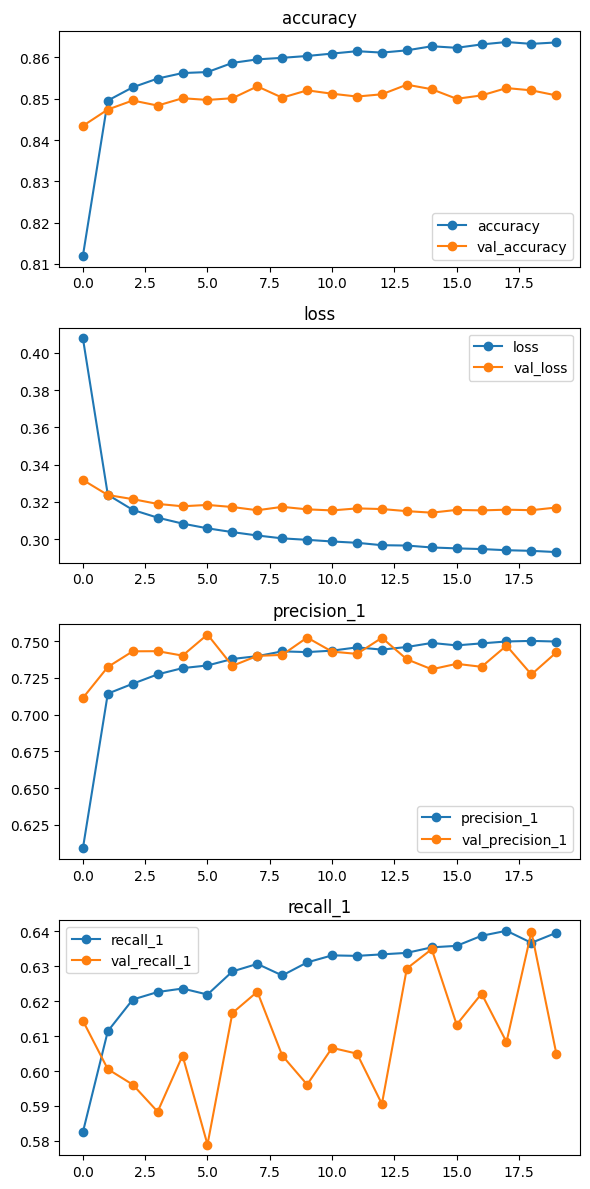

In [ ]:
# Call the custom function
plot_history(history);

In [ ]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_tf, y_test,return_dict=True)
result



382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3179 - precision_1: 0.7298 - recall_1: 0.5971


{'accuracy': 0.8522708415985107,
 'loss': 0.318729430437088,
 'precision_1': 0.7335004210472107,
 'recall_1': 0.6013698577880859}

In [ ]:
# make predictions
y_pred_test =model.predict(X_test_tf).round()
y_pred_test[:5]



382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

<a name='new20c'></a>

#Evaluate the model using sklearn evaluation metrics

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9278
           1       0.73      0.60      0.66      2920

    accuracy                           0.85     12198
   macro avg       0.81      0.77      0.78     12198
weighted avg       0.85      0.85      0.85     12198



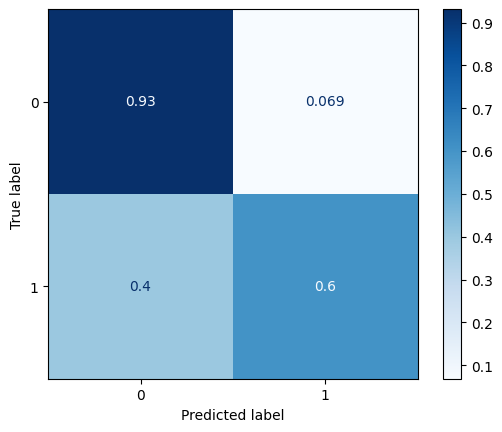

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

-----------------------------------------------------------
#another way

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9278
           1       0.73      0.60      0.66      2920

    accuracy                           0.85     12198
   macro avg       0.81      0.77      0.78     12198
weighted avg       0.85      0.85      0.85     12198



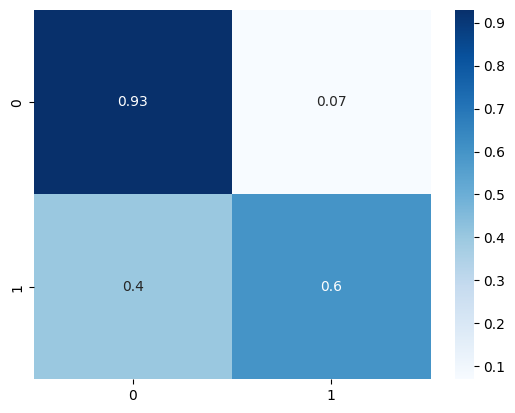

In [ ]:
# evaluate the model with sklearn metrics
test_preds = model.predict(X_test_tf).round()
print(classification_report(y_test, test_preds))
conf_mat =confusion_matrix(y_test, test_preds,normalize='true').round(2)
sns.heatmap(conf_mat, annot=True, fmt = 'g', cmap='Blues');

-----------------------------------------------------------

---------------------------------------------------------
<a name='new21'></a>
#⭐️ **Tune at least 3 parameters with the Keras tuner**
>[Click here](#new0) to jump to up .

In [ ]:
!pip install keras-tuner
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
# Build and Compile Model within a function to try optimizers
def build_model2(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(units=hp.Int(name="units",min_value=5, max_value=50, step=5),#Tuning Units with hp.Int()
                input_dim =input_shape,
                activation = 'relu'))

    model.add(Dropout(hp.Float(name="dropout_value",min_value=0.0,max_value=0.5,step=0.1))) # Tuning Units with hp.Int()
    #output Layer
    model.add(Dense(1, activation = 'sigmoid'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")# Tuning learning rate with hp.Float()

    # Compile Model
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),# Tuning (Select an option from a list)
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model



# define a folder to save the information for our trials

In [ ]:
# Make a folder to store results of hyperparameter tuning
import os
folder1 = 'KerasTuner/'
os.makedirs(folder1, exist_ok=True)

In [ ]:
# Define tuner object
tuner = kt.Hyperband(build_model2,
                     objective='val_accuracy',
                     max_epochs=100,
                     directory=folder1,
                     overwrite = True,
                     seed = 42,
                     max_retries_per_trial=0,
                     project_name='incom_tuning')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)



In [ ]:
# Run the tuner
epochs = 100
tuner.search(X_train_tf, y_train,  epochs=epochs,
             validation_split=.2, callbacks = [early_stop])



Trial 179 Complete [00h 00m 15s]
val_accuracy: 0.8538051843643188

Best val_accuracy So Far: 0.8554447293281555
Total elapsed time: 00h 50m 36s


# best-performing values for our hyperparameter(s)

In [ ]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values


{'units': 45,
 'dropout_value': 0.1,
 'optimizer': 'adam',
 'tuner/epochs': 12,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 4,
 'tuner/round': 2,
 'tuner/trial_id': '0108'}

In [ ]:
# Obtain best model
best_model2 = tuner.get_best_models()[0]
best_model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 45)                  │           4,905 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 45)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              46 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,951 (19.34 KB)

 Trainable params: 4,951 (19.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Evaluate neural network with tuned optimizer, units, and dropout
result = best_model2.evaluate(X_test_tf, y_test, return_dict=True)
result



382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8538 - loss: 0.3138 - precision: 0.7225 - recall: 0.6294


{'accuracy': 0.8545663356781006,
 'loss': 0.31510263681411743,
 'precision': 0.7268408536911011,
 'recall': 0.6287671327590942}

In [ ]:
# make predictions
y_pred_testt =best_model2.predict(X_test_tf).round()
y_pred_testt[:5]



382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9278
           1       0.73      0.63      0.67      2920

    accuracy                           0.85     12198
   macro avg       0.81      0.78      0.79     12198
weighted avg       0.85      0.85      0.85     12198



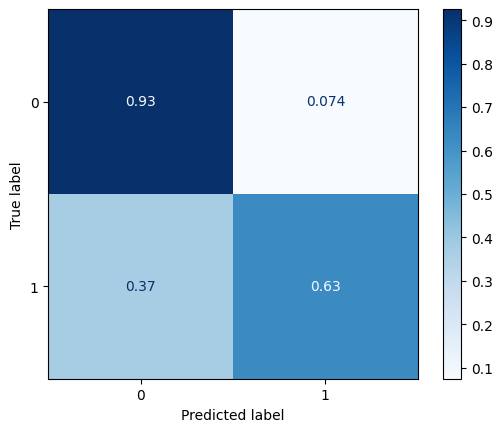

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_testt))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_testt, cmap='Blues',
                                       normalize='true');


#Tuning the hyperparameters only slightly improved the recall for the 'Incom' category (1)